### 농구 선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제

#### 문제 정의
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수 이름
- POS    : 포지션 (SG : Shooting Guard, C : Center)
- 3P     : 한 경기당 평균 3점슛 성공 횟수
- 2P     : 한 경기당 평균 2점슛 성공 횟수
- TRB    : 한 경기당 평균 리바운드 성공 횟수
- AST    : 한 경기당 평균 어시스트 성공 횟수
- STL    : 한 경기당 평균 스틸 성공 횟수
- BLK    : 한 경기당 평균 블로킹 성공 횟수

In [3]:
# 포지션의 종류 파악
df.Pos.unique()

array(['SG', 'C'], dtype=object)

In [4]:
# 포지션별 개수 파악
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C  : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다
- SG : 코트내에서 3점 슛 등  장거리에서 슛을 해서 점수를 얻는 역할

### 데이터 시각화
데이터를 특징을 바탕으로 한 공간에서 시각화 함으로써 머신러닝 학습에 필요한 특징과    
불필요한 특징을 쉽게 구분

In [5]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 스틸, 2점슛 데이터 시각화

In [6]:
import seaborn as sns

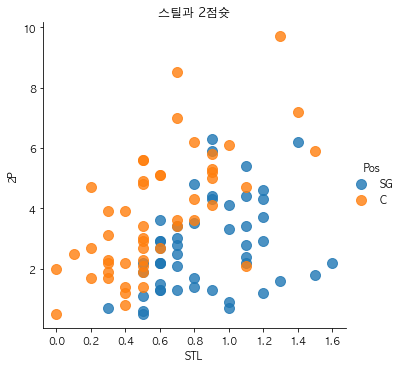

In [7]:
sns.lmplot(
  "STL",
  "2P",
  data=df,
  scatter_kws={"s":100}, # 좌표상의 점의 크기
  hue = "Pos", # 대상값
  fit_reg=False, # 회귀선을 안보겠다
)
plt.title("스틸과 2점슛")
plt.show()

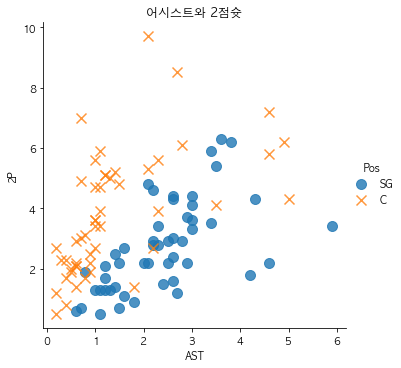

In [8]:
### 어시스트와 2점슛 데이터 시각화
sns.lmplot(
  "AST",
  "2P",
  data=df,
  markers=["o","x"], # 마커 종류 변경
  scatter_kws={"s":100}, # 좌표상의 점의 크기
  hue = "Pos", # 대상값
  fit_reg=False, # 회귀선을 안보겠다
)
plt.title("어시스트와 2점슛")
plt.show()

> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의    
경계가 너무 근접해서 분류하기 모호하다

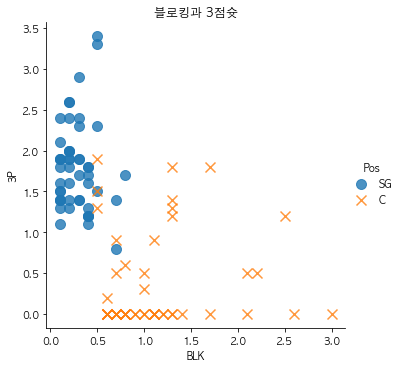

In [9]:
# 블로킹과 3점슛
sns.lmplot(
  "BLK",
  "3P",
  data=df,
  markers=["o","x"], # 마커 종류 변경
  scatter_kws={"s":100}, # 좌표상의 점의 크기
  hue = "Pos", # 대상값
  fit_reg=False, # 회귀선을 안보겠다
)
plt.title("블로킹과 3점슛")
plt.show()

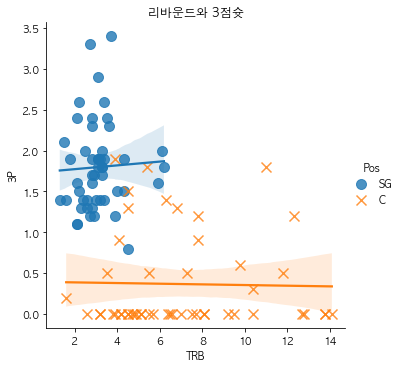

In [10]:
# 리바운드와 3점슛
sns.lmplot(
  "TRB",
  "3P",
  data=df,
  markers=["o","x"], # 마커 종류 변경
  scatter_kws={"s":100}, # 좌표상의 점의 크기
  hue = "Pos", # 대상값
  fit_reg=True, # 회귀선을 안보겠다
)
plt.title("리바운드와 3점슛")
plt.show()

> 회귀선이 수평을 이루면 서로 분류를 할 수 있다!

> 동일한 분류끼리는 서로 근접해있고, 다른 분류와는 멀리 떨어져 있음    
시각화한 결과에서 데이터의 구분이 확실할 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다

# 데이터 다듬기
: 분별력이 없는 특징(feature)을 데이터에서 제거    
시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다

In [11]:
# 분별력이 없는 특징(feature) 제거
df.drop(["2P","AST","STL"], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [12]:
# 학습 데이터와 검증 데이터로 나누기
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다.
# train_x, test_x, train_y, test_y = \
#   train_test_split(df.drop("Pos", axis=1), df.Pos)
train, test = train_test_split(df, test_size=0.2)

In [13]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv", index=None)
test.to_csv("../Data/basketball_test.csv", index=None)